

# Item 2 do mini-projeto - Detecção, reconhecimento e filtragem de sinais.
---
> **Filtragem discriminativa (entrega: código)**




> **Objetivo:** *Encontrar determinado padrão na imagem proposta utilizando filtro discriminativo.*


---

Imagem proposta:





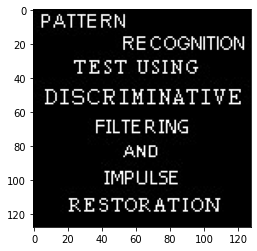

---
Padrão a ser encontrado:


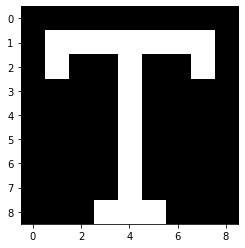

# **1. Importar bibliotecas necessárias para implementação**



In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
import time

# **2.   Importar imagem que contém o padrão a ser encontrado**



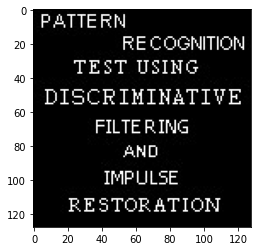

In [4]:
img = cv2.imread('imagem.jpg', 0)
new_image = ((cv2.threshold(img,127,255,cv2.THRESH_BINARY)[1])/255)
plt.imshow(img,cmap='gray')

# **3. Gerar o padrão a ser encontrado na imagem proposta**



(9, 9)
<class 'numpy.ndarray'>


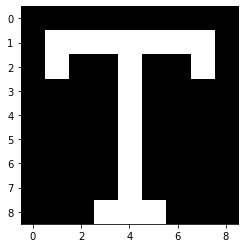

In [5]:
u_line0 = np.zeros(9)
u_line1 = [0,1,1,1,1,1,1,1,0]
u_line2 = [0,1,0,0,1,0,0,1,0]
u_line3 = [0,0,0,0,1,0,0,0,0]
u_line4 = [0,0,0,0,1,0,0,0,0]
u_line5 = [0,0,0,0,1,0,0,0,0]
u_line6 = [0,0,0,0,1,0,0,0,0]
u_line7 = [0,0,0,0,1,0,0,0,0]
u_line8 = [0,0,0,1,1,1,0,0,0]

u = np.array([u_line0,u_line1,u_line2,u_line3,u_line4,u_line5,u_line6,u_line7,u_line8],dtype=int)
print(u.shape)   
print(type(u))
plt.imshow(u, cmap='gray')

# **4. Gerar as matrizes H que compõem F.**


In [6]:
########Escolha do elemento de u para ser o primeiro elemento da primeira linha de h ########
#hn_x=-4 -> u[0][4]
#hn_x=-3 -> u[1][4]
#hn_x=-2 -> u[2][4]
#hn_x=-1 -> u[3][4]
#hn_x=0  -> u[4][4]
# .
# .
# .
#hn_x=4  -> u[8][4]


######## Primeira linha de h a partir da matriz u - exemplo hn_x=0########
#hn[0][0] = u[4][4]
#hn[0][1] = u[4][0]
#hn[0][2] = u[4][1]
#hn[0][3] = u[4][2]
#hn[0][4] = u[4][3]
#hn[0][5] = u[4][5]
#hn[0][6] = u[4][6]
#hn[0][7] = u[4][7]
#hn[0][8] = u[4][8]

def get_hn(u,h_index,lenght):
  matrix_lenght = lenght
  lenght = int((lenght-1)/2)
  h_index = int(h_index)
  hn = np.zeros((9,9),dtype=int)
  uh_line = u[(lenght+h_index)]
  u_first = uh_line[lenght]
  
  #print('esse é uh line',uh_line)
  subMatrix1 = uh_line[:lenght]
  subMatrix1 =np.flip(subMatrix1,axis=0)
  #print('\n este é sub1 \n', subMatrix1)
  subMatrix2 = uh_line[lenght+1:]
  subMatrix2 =np.flip(subMatrix2,axis=0)
  #print('\n este é sub2 \n', subMatrix2)
  hn[0]=np.concatenate((u_first,subMatrix1, subMatrix2), axis=None)
  #print('\n esta é primeira linha \n', subMatrix2)
  #hn[0] = np.hstack((u_first,uh_line))
  for i in range (1,matrix_lenght):
    uh_line = hn[i-1]
    u_first = uh_line[matrix_lenght-1]
    uh_line = np.delete(uh_line,[matrix_lenght-1])
    hn[i] = np.hstack((u_first,uh_line))
  return hn


In [7]:
H = np.random.randint(1, size=(9,9,9))

for i in range (-4,5,1):
  H[i+4]=get_hn(u,i,9)
  print('\nEsse é H',i,'\n',H[i+4])


Esse é H -4 
 [[0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]]

Esse é H -3 
 [[1 1 1 1 0 0 1 1 1]
 [1 1 1 1 1 0 0 1 1]
 [1 1 1 1 1 1 0 0 1]
 [1 1 1 1 1 1 1 0 0]
 [0 1 1 1 1 1 1 1 0]
 [0 0 1 1 1 1 1 1 1]
 [1 0 0 1 1 1 1 1 1]
 [1 1 0 0 1 1 1 1 1]
 [1 1 1 0 0 1 1 1 1]]

Esse é H -2 
 [[1 0 0 1 0 0 1 0 0]
 [0 1 0 0 1 0 0 1 0]
 [0 0 1 0 0 1 0 0 1]
 [1 0 0 1 0 0 1 0 0]
 [0 1 0 0 1 0 0 1 0]
 [0 0 1 0 0 1 0 0 1]
 [1 0 0 1 0 0 1 0 0]
 [0 1 0 0 1 0 0 1 0]
 [0 0 1 0 0 1 0 0 1]]

Esse é H -1 
 [[1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 1]]

Esse é H 0 
 [[1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1 0

**5. Gerar a matriz F formado por matrizes H.**

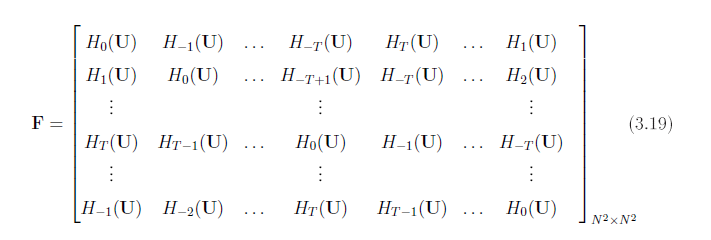

In [8]:
#H[0] = h_-4
#H[1] = h_-3
#H[2] = h_-2
#H[3] = h_-1
#H[4] = h_0
#H[5] = h_1
#H[6] = h_2
#H[7] = h_3
#H[8] = h_4
def matrix_F(H):
  Linha1 = np.hstack((H[4],H[3],H[2],H[1],H[0],H[8],H[7],H[6],H[5]))
  Linha2 = np.hstack((H[5],H[4],H[3],H[2],H[1],H[0],H[8],H[7],H[6]))
  Linha3 = np.hstack((H[6],H[5],H[4],H[3],H[2],H[1],H[0],H[8],H[7]))
  Linha4 = np.hstack((H[7],H[6],H[5],H[4],H[3],H[2],H[1],H[0],H[8]))
  Linha5 = np.hstack((H[8],H[7],H[6],H[5],H[4],H[3],H[2],H[1],H[0]))
  Linha6 = np.hstack((H[0],H[8],H[7],H[6],H[5],H[4],H[3],H[2],H[1]))
  Linha7 = np.hstack((H[1],H[0],H[8],H[7],H[6],H[5],H[4],H[3],H[2]))
  Linha8 = np.hstack((H[2],H[1],H[0],H[8],H[7],H[6],H[5],H[4],H[3]))
  Linha9 = np.hstack((H[3],H[2],H[1],H[0],H[8],H[7],H[6],H[5],H[4]))
  F = np.vstack((Linha1,Linha2,Linha3,Linha4,Linha5,Linha6,Linha7,Linha8,Linha9))
  return F

In [9]:
F = matrix_F(H)
print('Matriz F:\n',F)

Matriz F:
 [[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]


# **5. Calcular o estimador linear - Matriz A**


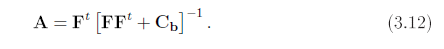

In [10]:
def matrix_A(F):
  matrix = np.matmul(F.T,np.linalg.inv(np.matmul(F,F.T)))
  return matrix

In [11]:
A = matrix_A(F)
print('Matriz A:\n',A)


Matriz A:
 [[ 0.08431987  0.08057005 -0.13027237 ... -0.0075638   0.12314967
  -0.0647751 ]
 [ 0.08057005  0.08431987  0.08057005 ... -0.02563069 -0.0075638
   0.12314967]
 [-0.13027237  0.08057005  0.08431987 ... -0.02563069 -0.02563069
  -0.0075638 ]
 ...
 [ 0.05555979 -0.04159729 -0.04159729 ...  0.08431987  0.08057005
  -0.13027237]
 [ 0.01472219  0.05555979 -0.04159729 ...  0.08057005  0.08431987
   0.08057005]
 [ 0.00523902  0.01472219  0.05555979 ... -0.13027237  0.08057005
   0.08431987]]


# **6. Encontrar o filtro discriminativo (teta) por inspeção da matriz A**

In [12]:
def teta (A):
  aux = A[49,:9]
  linha0 = np.concatenate((np.flip(aux[4:]),np.flip(aux[:4])))
  aux = A[58,:9]
  linha1 = np.concatenate((np.flip(aux[4:]),np.flip(aux[:4])))
  aux = A[67,:9]
  linha2 = np.concatenate((np.flip(aux[4:]),np.flip(aux[:4])))
  aux = A[76,:9]
  linha3 = np.concatenate((np.flip(aux[4:]),np.flip(aux[:4])))
  aux = A[4,:9]
  linha4 = np.concatenate((np.flip(aux[4:]),np.flip(aux[:4])))
  aux = A[13,:9]
  linha5 = np.concatenate((np.flip(aux[4:]),np.flip(aux[:4])))
  aux = A[22,:9]
  linha6 = np.concatenate((np.flip(aux[4:]),np.flip(aux[:4])))
  aux = A[31,:9]
  linha7 = np.concatenate((np.flip(aux[4:]),np.flip(aux[:4])))
  aux = A[40,:9]
  linha8 = np.concatenate((np.flip(aux[4:]),np.flip(aux[:4])))
  filtro = np.vstack((linha0,linha1,linha2,linha3,linha4,linha5,linha6,linha7,linha8))
  return filtro


In [13]:
t = teta(A)
print('Matriz teta:\n',t)

Matriz teta:
 [[-0.10239521 -0.01447334 -0.04797237  0.17298543 -0.01152302  0.17298543
  -0.04797237 -0.01447334 -0.10239521]
 [-0.03140194 -0.06853607  0.09667351 -0.07560403  0.14825967 -0.07560403
   0.09667351 -0.06853607 -0.03140194]
 [ 0.10546345 -0.04834555 -0.00322419 -0.07545431  0.04611734 -0.07545431
  -0.00322419 -0.04834555  0.10546345]
 [-0.04159729  0.05555979  0.01472219  0.00523902 -0.07046096  0.00523902
   0.01472219  0.05555979 -0.04159729]
 [ 0.00955166 -0.01630708 -0.13027237  0.08057005  0.08431987  0.08057005
  -0.13027237 -0.01630708  0.00955166]
 [-0.02563069 -0.0075638   0.12314967 -0.0647751  -0.0875912  -0.0647751
   0.12314967 -0.0075638  -0.02563069]
 [ 0.11554413  0.02468219 -0.11215726 -0.11310558  0.21208012 -0.11310558
  -0.11215726  0.02468219  0.11554413]
 [-0.07497417  0.08223573  0.15314869 -0.00822321 -0.17085948 -0.00822321
   0.15314869  0.08223573 -0.07497417]
 [ 0.06265904 -0.04071516 -0.09439275  0.04295513  0.00917683  0.04295513
  -0.0943

# **7 Convoluir o filtro encontrado com a imagem proposta**


**Referencia: arquivo convolucao.m disponibilizado pelo professor**

In [14]:
def convolucao(T,U):

  C=np.zeros((U.shape[0],U.shape[0]))
  for m in range(-4,5,1):
    for n in range(-4,5,1):
      soma=0
      for ml in range(-4,5,1):
        for nl in range(-4,5,1):
          indm=m-ml
          indn=n-nl
          if indm<-(U.shape[0]-1)/2:
            indm=indm+U.shape[0]

          if indn<-(U.shape[0]-1)/2:
            indn=indn+U.shape[0]

          if indm>(U.shape[0]-1)/2:
            indm=indm-U.shape[0]

          if indn>(U.shape[0]-1)/2:
            indn=indn-U.shape[0]

          indm=indm+(U.shape[0]+1)/2
          indn=indn+(U.shape[0]+1)/2
          
          indm = round(indm) -1
          indn = round(indn) -1
          soma=soma+U[indm,indn]*T[round(ml+(U.shape[0]+1)/2)-1,round(nl+(U.shape[0]+1)/2)-1]

      C[round(m+(U.shape[0]+1)/2)-1,round(n+(U.shape[0]+1)/2)-1]=soma
      if C[round(m+(U.shape[0]+1)/2)-1,round(n+(U.shape[0]+1)/2)-1]*C[round(m+(U.shape[0]+1)/2)-1,round(n+(U.shape[0]+1)/2)-1]<0.00001:
        C[round(m+(U.shape[0]+1)/2)-1,round(n+(U.shape[0]+1)/2)-1]=0

    
  energia = sum(sum(C*C));
  center = np.ceil(len(U)/2);

  if energia != 0:
    dsnr    = C[round(center)-1,round(center)-1]*C[round(center)-1,round(center)-1]/(energia-C[round(center)-1,round(center)-1]*C[round(center)-1,round(center)-1]); 
  else:
    dsnr =0
  return dsnr, C

In [16]:
imagem_filtrada = new_image
subimage_line=0
subimage_col=0
tempo_inicial = time.clock()
for i in range(9,128):
  subimage_col=0
  for j in range(9,119):
    dsnr,C= convolucao(t,imagem_filtrada[subimage_line:i,subimage_col:j])
    if (math.isinf(dsnr)):
      print('Padrão encontrado')
      result = np.ones((9,9))
      result[1:-1,1:-1] = 0
      imagem_filtrada[subimage_line:i,subimage_col:j] = result 
    subimage_col+=1  
  subimage_line+=1
  print('Progresso do processo de filtragem:\n',round((100*subimage_line)/119,2),'%')
print("tempo decorrido",time.clock()-tempo_inicial)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  after removing the cwd from sys.path.


Progresso do processo de filtragem:
 0.84 %
Progresso do processo de filtragem:
 1.68 %
Progresso do processo de filtragem:
 2.52 %
Progresso do processo de filtragem:
 3.36 %
Progresso do processo de filtragem:
 4.2 %
Progresso do processo de filtragem:
 5.04 %
Progresso do processo de filtragem:
 5.88 %
Progresso do processo de filtragem:
 6.72 %
Progresso do processo de filtragem:
 7.56 %
Progresso do processo de filtragem:
 8.4 %
Progresso do processo de filtragem:
 9.24 %
Progresso do processo de filtragem:
 10.08 %
Progresso do processo de filtragem:
 10.92 %
Progresso do processo de filtragem:
 11.76 %
Progresso do processo de filtragem:
 12.61 %
Progresso do processo de filtragem:
 13.45 %
Progresso do processo de filtragem:
 14.29 %
Progresso do processo de filtragem:
 15.13 %
Progresso do processo de filtragem:
 15.97 %
Progresso do processo de filtragem:
 16.81 %
Progresso do processo de filtragem:
 17.65 %
Progresso do processo de filtragem:
 18.49 %
Progresso do processo d

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in double_scalars


Padrão encontrado
Padrão encontrado
Progresso do processo de filtragem:
 25.21 %
Progresso do processo de filtragem:
 26.05 %
Progresso do processo de filtragem:
 26.89 %
Progresso do processo de filtragem:
 27.73 %
Progresso do processo de filtragem:
 28.57 %
Progresso do processo de filtragem:
 29.41 %
Progresso do processo de filtragem:
 30.25 %
Progresso do processo de filtragem:
 31.09 %
Progresso do processo de filtragem:
 31.93 %
Progresso do processo de filtragem:
 32.77 %
Progresso do processo de filtragem:
 33.61 %
Progresso do processo de filtragem:
 34.45 %
Progresso do processo de filtragem:
 35.29 %
Progresso do processo de filtragem:
 36.13 %
Progresso do processo de filtragem:
 36.97 %
Progresso do processo de filtragem:
 37.82 %
Progresso do processo de filtragem:
 38.66 %
Progresso do processo de filtragem:
 39.5 %
Progresso do processo de filtragem:
 40.34 %
Progresso do processo de filtragem:
 41.18 %
Progresso do processo de filtragem:
 42.02 %
Progresso do process

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


# **8. Resultado da filtragem**

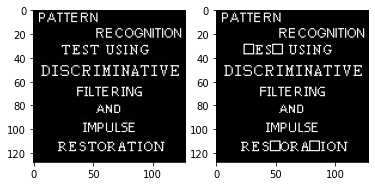

In [17]:
f = plt.figure()
f.add_subplot(1,2, 1)

plt.imshow(img,cmap= 'gray')

f.add_subplot(1,2, 2)
plt.imshow(imagem_filtrada,'gray')
plt.show(block=True)